# PUNJAB

In [491]:
import pandas as pd

# Load the datasets for Punjab
df_pb_enrolment = pd.read_csv('/content/Punjab Enrolment State.csv')
df_pb_demographic = pd.read_csv('/content/Punjab Demographic State.csv')
df_pb_biometric = pd.read_csv('/content/Punjab Biometric State.csv')

print("Punjab Enrolment Dataset:")
print(df_pb_enrolment.head())
print(df_pb_enrolment.info())
print(df_pb_enrolment.describe())

print("\nPunjab Demographic Dataset:")
print(df_pb_demographic.head())
print(df_pb_demographic.info())
print(df_pb_demographic.describe())

print("\nPunjab Biometric Dataset:")
print(df_pb_biometric.head())
print(df_pb_biometric.info())
print(df_pb_biometric.describe())

Punjab Enrolment Dataset:
         date   state    district  pincode  age_0_5  age_5_17  age_18_greater
0  01-04-2025  Punjab    Ludhiana   141007      374       110              25
1  01-04-2025  Punjab    Ludhiana   141012       52        22              10
2  01-05-2025  Punjab  Hoshiarpur   146001      197        48              18
3  01-05-2025  Punjab  Kapurthala   144401      113        40              15
4  01-06-2025  Punjab    Ludhiana   141007      257       159              17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24277 entries, 0 to 24276
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            24277 non-null  object
 1   state           24277 non-null  object
 2   district        24277 non-null  object
 3   pincode         24277 non-null  int64 
 4   age_0_5         24277 non-null  int64 
 5   age_5_17        24277 non-null  int64 
 6   age_18_greater  24277 non-null  int64 
dt

In [492]:
# Convert 'date' column to datetime objects
df_pb_enrolment['date'] = pd.to_datetime(df_pb_enrolment['date'], format='%d-%m-%Y')
df_pb_demographic['date'] = pd.to_datetime(df_pb_demographic['date'], format='%d-%m-%Y')
df_pb_biometric['date'] = pd.to_datetime(df_pb_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_pb_enrolment:")
print(df_pb_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_pb_demographic.info())
print("\nData types after conversion for df_pb_biometric:")
print(df_pb_biometric.info())

Data types after conversion for df_pb_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24277 entries, 0 to 24276
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24277 non-null  datetime64[ns]
 1   state           24277 non-null  object        
 2   district        24277 non-null  object        
 3   pincode         24277 non-null  int64         
 4   age_0_5         24277 non-null  int64         
 5   age_5_17        24277 non-null  int64         
 6   age_18_greater  24277 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.3+ MB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57300 entries, 0 to 57299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           57300 non-null  dateti

In [493]:
merged_df_pb_temp = pd.merge(df_pb_enrolment, df_pb_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_pb_merged = pd.merge(merged_df_pb_temp, df_pb_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_pb_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_pb_merged[numeric_cols] = df_pb_merged[numeric_cols].fillna(0)

# Convert 'date' column to datetime after merging
df_pb_merged['date'] = pd.to_datetime(df_pb_merged['date'], format='%d-%m-%Y', errors='coerce')


print("Merged DataFrame (df_merged) head:")
print(df_pb_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_pb_merged.info())

print("Shape of df_merged:", df_pb_merged.shape)
print("\nInfo of df_pb_merged:")
df_pb_merged.info()
print("\nDescription of df_pb_merged:")
print(df_pb_merged.describe())

df_pb = df_pb_merged[df_pb_merged['state'] == 'Punjab'].copy()
df_pb['year'] = df_pb['date'].dt.year
df_pb['month'] = df_pb['date'].dt.month

print("Shape of df_pb:", df_pb.shape)
print("\nFirst 5 rows of df_pb with new 'year' and 'month' columns:")
print(df_pb.head())

Merged DataFrame (df_merged) head:
        date   state  district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Punjab  Amritsar   143001      0.0       0.0             0.0   
1 2025-03-01  Punjab  Amritsar   143002      0.0       0.0             0.0   
2 2025-03-01  Punjab  Amritsar   143003      0.0       0.0             0.0   
3 2025-03-01  Punjab  Amritsar   143008      0.0       0.0             0.0   
4 2025-03-01  Punjab  Amritsar   143009      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          381.0        5616.0        2046.0       3687.0  
1           21.0         225.0          93.0         99.0  
2            0.0           0.0          10.0         37.0  
3           31.0         365.0           0.0          0.0  
4           12.0         302.0         100.0        219.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153840 entries, 0 to 153839
Data columns (total 11

In [494]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_pb_agg = df_pb.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_pb_agg) head:")
print(df_pb_agg.head())
print("\nAggregated DataFrame (df_pb_agg) info:")
print(df_pb_agg.info())

Aggregated DataFrame (df_pb_agg) head:
   year  month   state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Punjab         Amritsar     14.0      15.0            20.0   
1  2025      3  Punjab          Barnala      0.0       0.0             0.0   
2  2025      3  Punjab         Bathinda      0.0       0.0             0.0   
3  2025      3  Punjab         Faridkot      0.0       0.0             0.0   
4  2025      3  Punjab  Fatehgarh Sahib      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          898.0       15084.0        7123.0      15733.0  
1          129.0        2825.0         548.0       1260.0  
2          420.0        9412.0        5553.0      11333.0  
3          132.0        2866.0        1407.0       4242.0  
4          238.0        3975.0        2379.0       5100.0  

Aggregated DataFrame (df_pb_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 

In [495]:
import numpy as np

# 1. Create 'totalenrolments' column
df_pb_agg['totalenrolments'] = df_pb_agg['age_0_5'] + df_pb_agg['age_5_17'] + df_pb_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_pb_agg['childenrolments'] = df_pb_agg['age_0_5'] + df_pb_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_pb_agg['totaldemoupdates'] = df_pb_agg['demo_age_5_17'] + df_pb_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_pb_agg['totalbioupdates'] = df_pb_agg['bio_age_5_17'] + df_pb_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_pb_agg['CES'] = np.where(
    df_pb_agg['totalenrolments'] == 0,
    0,
    df_pb_agg['childenrolments'] / df_pb_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_pb_agg['DUR'] = np.where(
    df_pb_agg['totalenrolments'] == 0,
    0,
    df_pb_agg['totaldemoupdates'] / df_pb_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_pb_agg['BUR'] = np.where(
    df_pb_agg['totalenrolments'] == 0,
    0,
    df_pb_agg['totalbioupdates'] / df_pb_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_pb_agg) with new metrics head:")
print(df_pb_agg.head())

Aggregated DataFrame (df_pb_agg) with new metrics head:
   year  month   state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Punjab         Amritsar     14.0      15.0            20.0   
1  2025      3  Punjab          Barnala      0.0       0.0             0.0   
2  2025      3  Punjab         Bathinda      0.0       0.0             0.0   
3  2025      3  Punjab         Faridkot      0.0       0.0             0.0   
4  2025      3  Punjab  Fatehgarh Sahib      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          898.0       15084.0        7123.0      15733.0             49.0   
1          129.0        2825.0         548.0       1260.0              0.0   
2          420.0        9412.0        5553.0      11333.0              0.0   
3          132.0        2866.0        1407.0       4242.0              0.0   
4          238.0        3975.0        2379.0       5100.0              0.0   

   chi

In [496]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_pb_agg['Enorm'] = df_pb_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_pb_agg['Dnorm'] = df_pb_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_pb_agg['Bnorm'] = df_pb_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_pb_agg['stdnorm'] = (df_pb_agg['Enorm'] + df_pb_agg['Dnorm'] + df_pb_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_pb_agg['ALBI'] = 1 - df_pb_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_pb_agg['ALBI'] = df_pb_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_pb_agg) with normalized metrics and ALBI head:")
print(df_pb_agg.head())

Aggregated DataFrame (df_pb_agg) with normalized metrics and ALBI head:
   year  month   state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Punjab         Amritsar     14.0      15.0            20.0   
1  2025      3  Punjab          Barnala      0.0       0.0             0.0   
2  2025      3  Punjab         Bathinda      0.0       0.0             0.0   
3  2025      3  Punjab         Faridkot      0.0       0.0             0.0   
4  2025      3  Punjab  Fatehgarh Sahib      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          898.0       15084.0        7123.0  ...           15982.0   
1          129.0        2825.0         548.0  ...            2954.0   
2          420.0        9412.0        5553.0  ...            9832.0   
3          132.0        2866.0        1407.0  ...            2998.0   
4          238.0        3975.0        2379.0  ...            4213.0   

   totalbioupdates       CES    

In [497]:
df_pb_agg['Enormrisk'] = 1 - df_pb_agg['Enorm']
df_pb_agg['CESrisknorm'] = 1 - df_pb_agg['CES']
df_pb_agg['DURrisknorm'] = 1 - df_pb_agg['DUR']
df_pb_agg['BURrisknorm'] = 1 - df_pb_agg['BUR']
df_pb_agg['ALBIrisknorm'] = 1 - df_pb_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_pb_agg['riskscore'] = (
    df_pb_agg['Enormrisk'] +
    df_pb_agg['CESrisknorm'] +
    df_pb_agg['DURrisknorm'] +
    df_pb_agg['BURrisknorm'] +
    df_pb_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_pb_agg) with risk components and riskscore head:")
print(df_pb_agg.head())

Aggregated DataFrame (df_pb_agg) with risk components and riskscore head:
   year  month   state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Punjab         Amritsar     14.0      15.0            20.0   
1  2025      3  Punjab          Barnala      0.0       0.0             0.0   
2  2025      3  Punjab         Bathinda      0.0       0.0             0.0   
3  2025      3  Punjab         Faridkot      0.0       0.0             0.0   
4  2025      3  Punjab  Fatehgarh Sahib      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          898.0       15084.0        7123.0  ...  0.516081  0.674039   
1          129.0        2825.0         548.0  ...  0.095389  0.053319   
2          420.0        9412.0        5553.0  ...  0.317489  0.497980   
3          132.0        2866.0        1407.0  ...  0.096810  0.166593   
4          238.0        3975.0        2379.0  ...  0.136044  0.220561   

    stdnorm      A

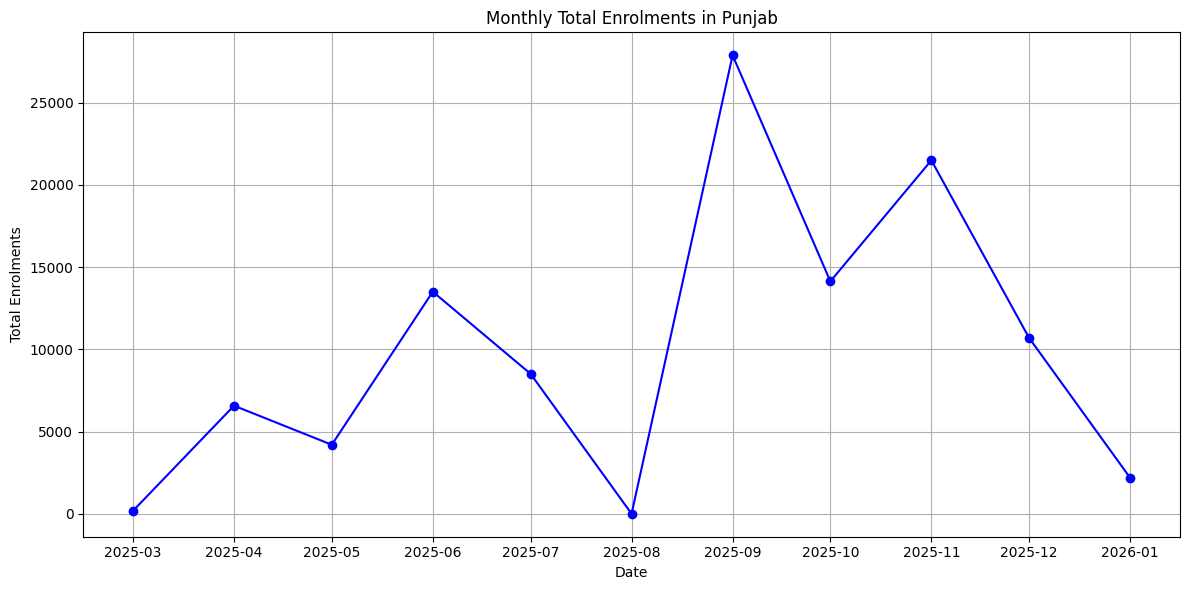

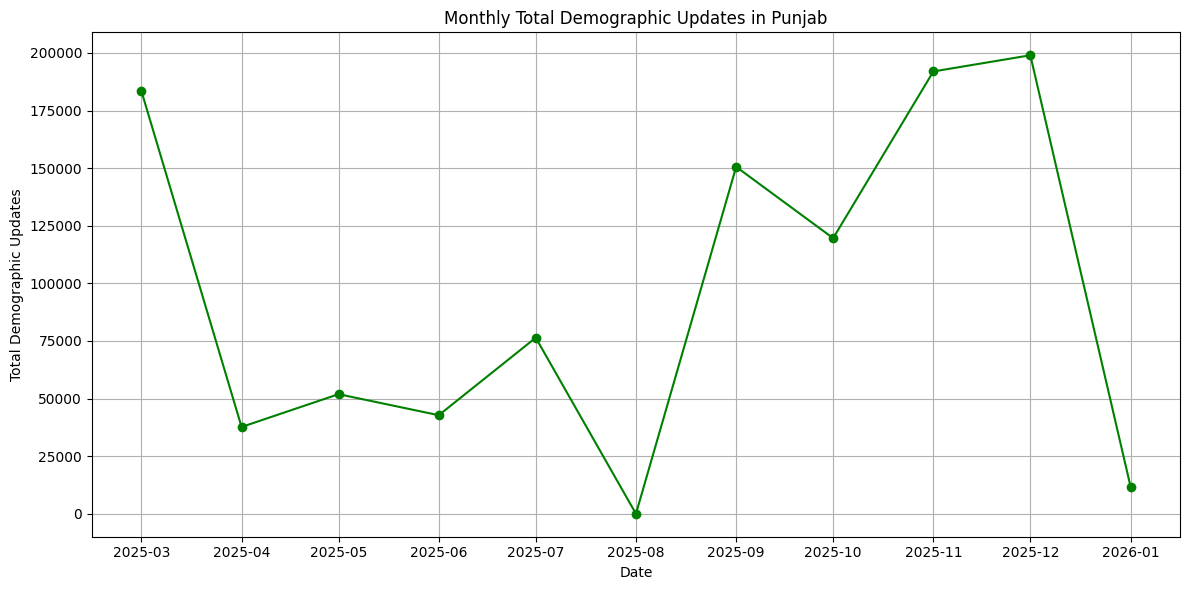

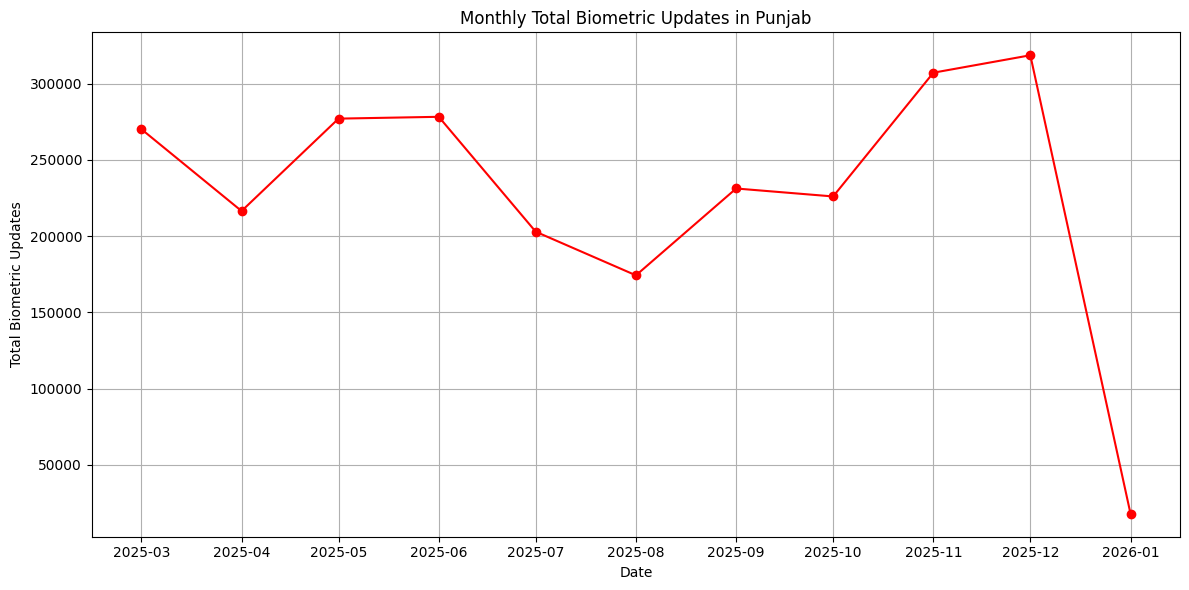

Monthly trend plots generated successfully.


In [498]:
import matplotlib.pyplot as plt

df_pb_monthly_trends = df_pb_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_pb_monthly_trends['date'] = pd.to_datetime(df_pb_monthly_trends['year'].astype(str) + '-' + df_pb_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_pb_monthly_trends = df_pb_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_pb_monthly_trends['date'], df_pb_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Punjab')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_pb_monthly_trends['date'], df_pb_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Punjab')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_pb_monthly_trends['date'], df_pb_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Punjab')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

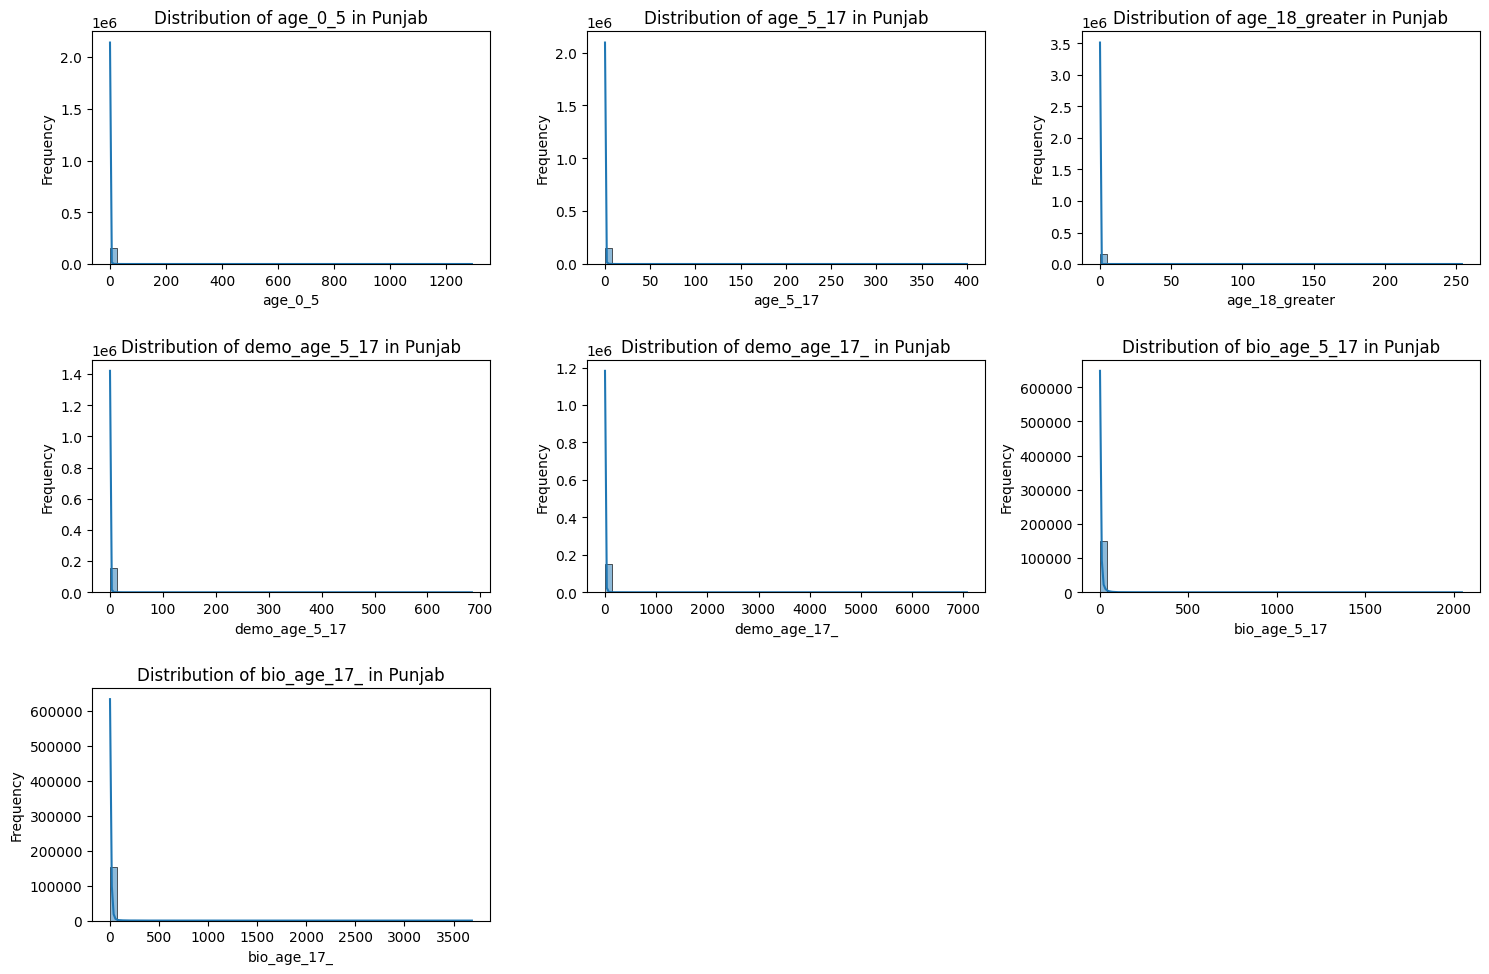

Histograms for numerical columns and count plot for 'district' displayed for Punjab.


In [499]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_pb_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Punjab')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


print("Histograms for numerical columns and count plot for 'district' displayed for Punjab.")

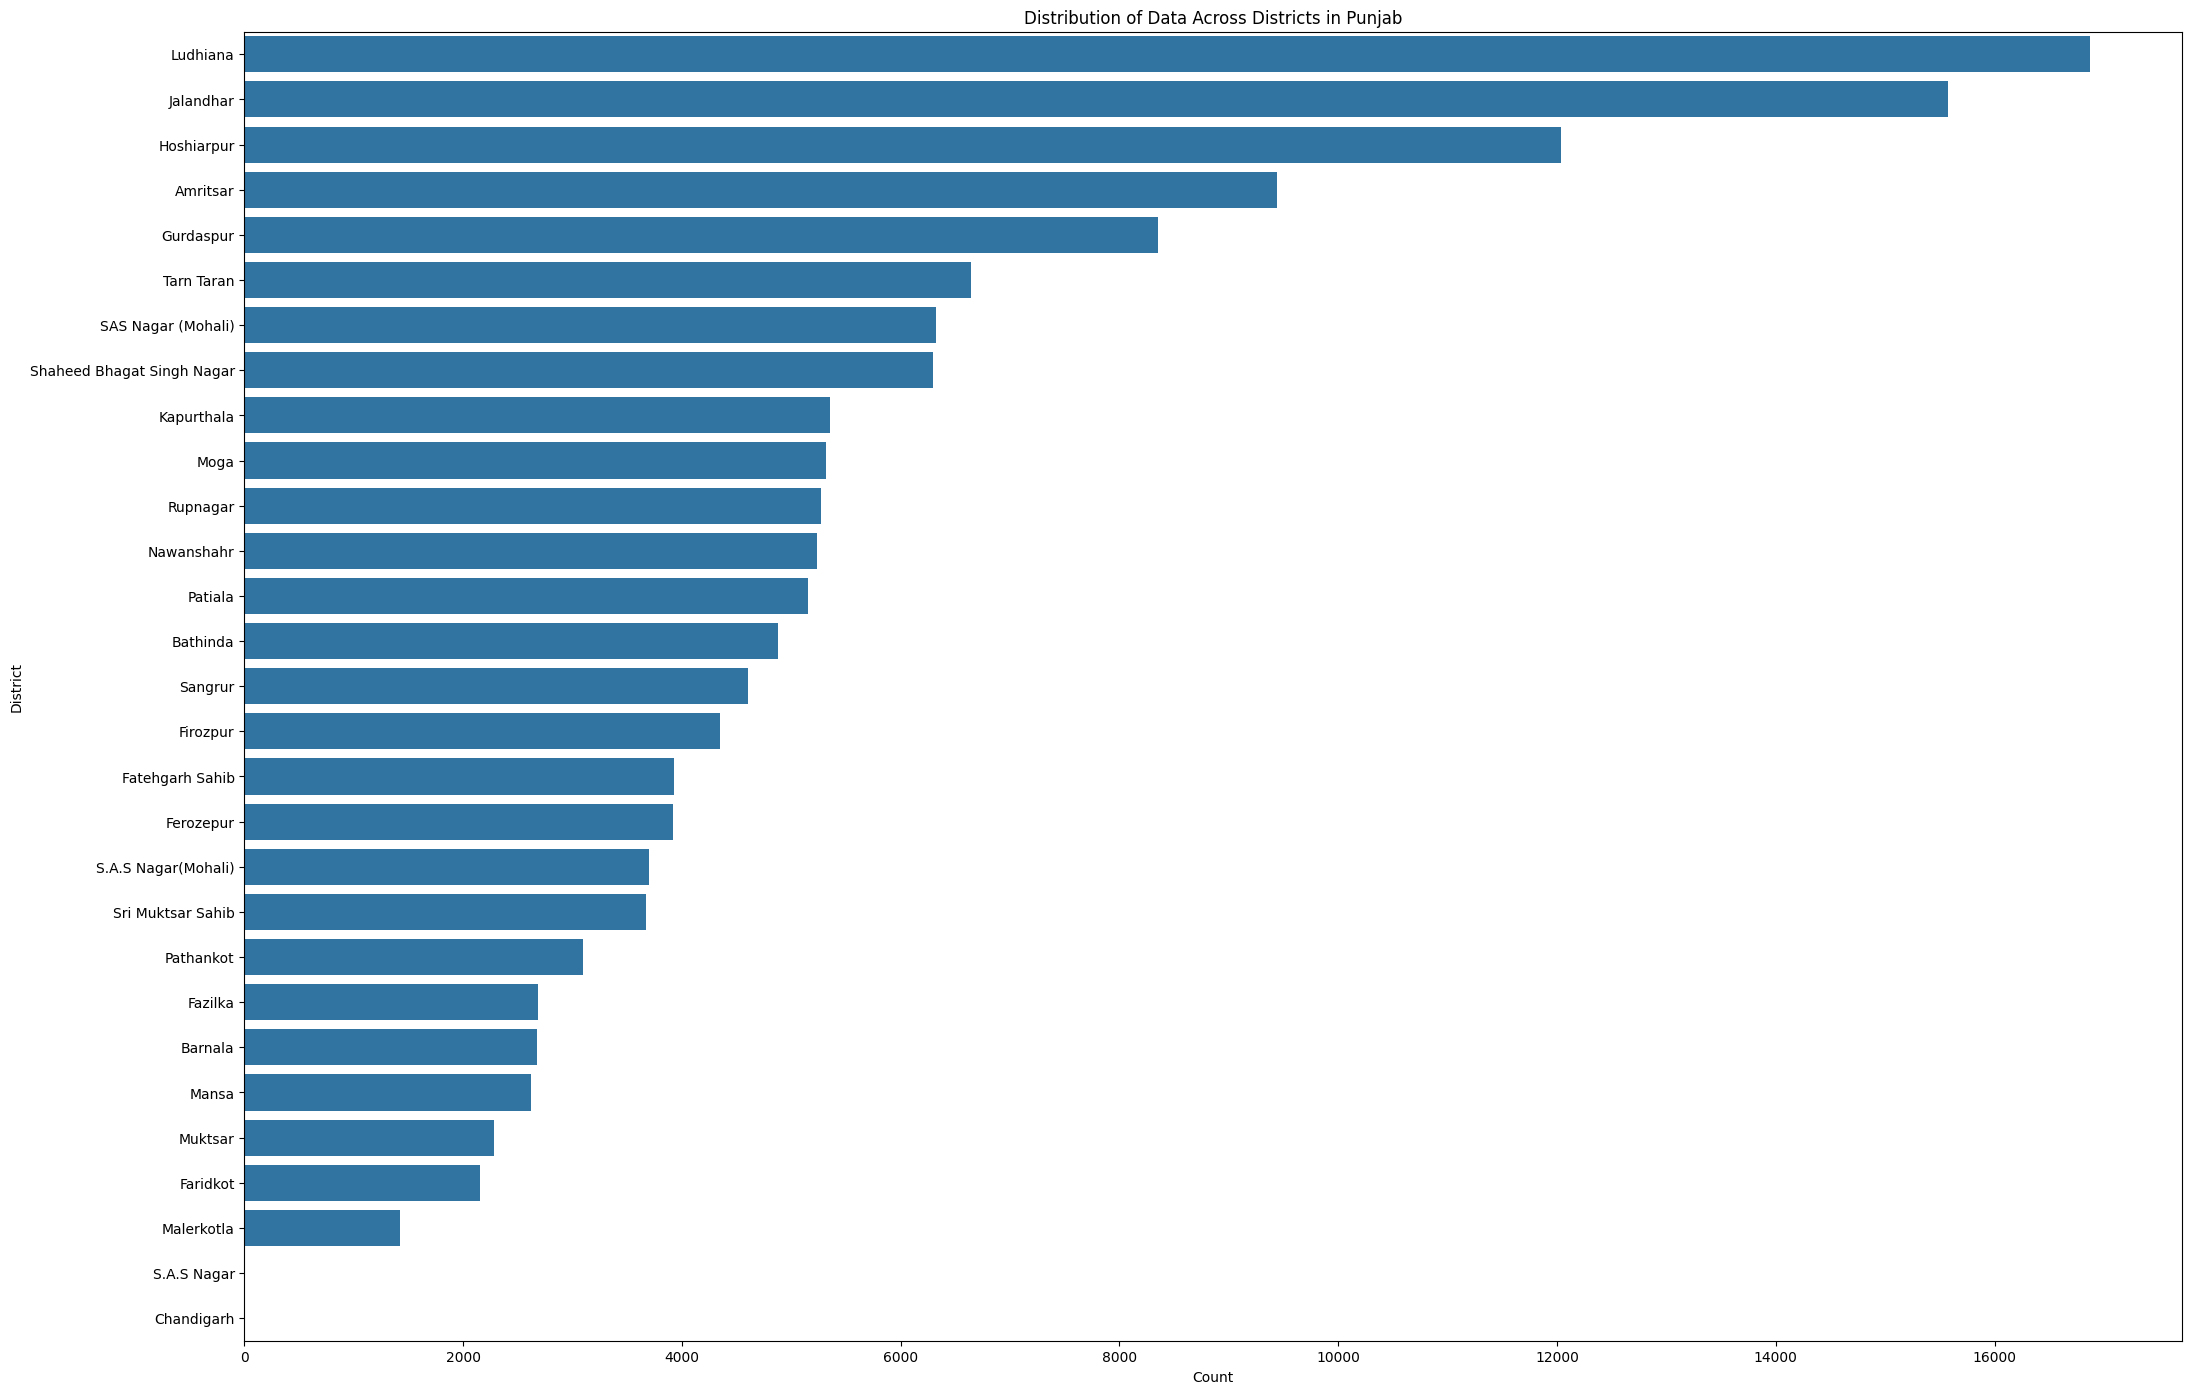

In [500]:
import seaborn as sns
plt.figure(figsize=(25, 17))
sns.countplot(data=df_pb_merged, y='district', order=df_pb_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Punjab')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

**Bivariate and trivariate Analysis**

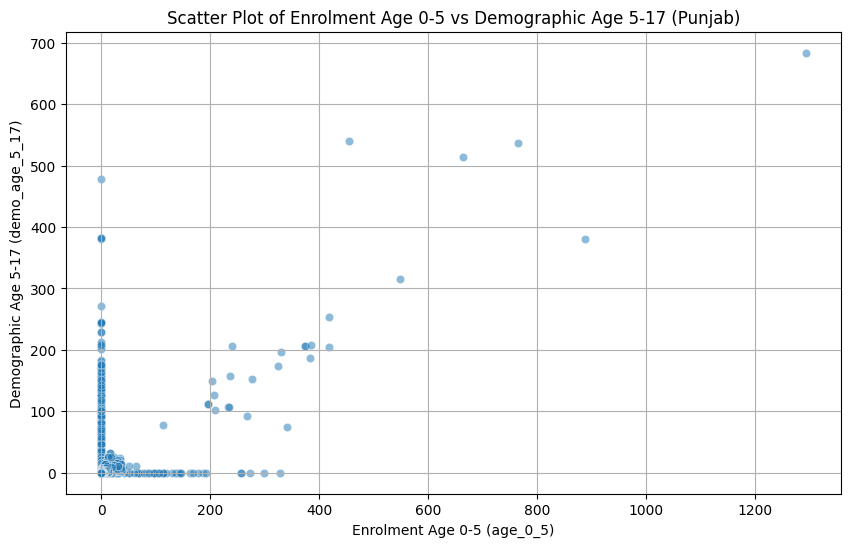

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [501]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pb_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Punjab)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

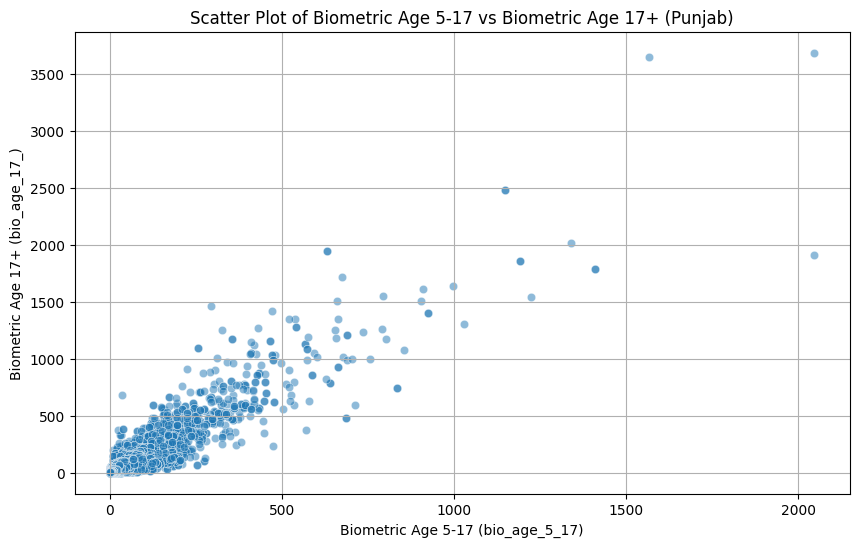

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [502]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pb_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Punjab)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

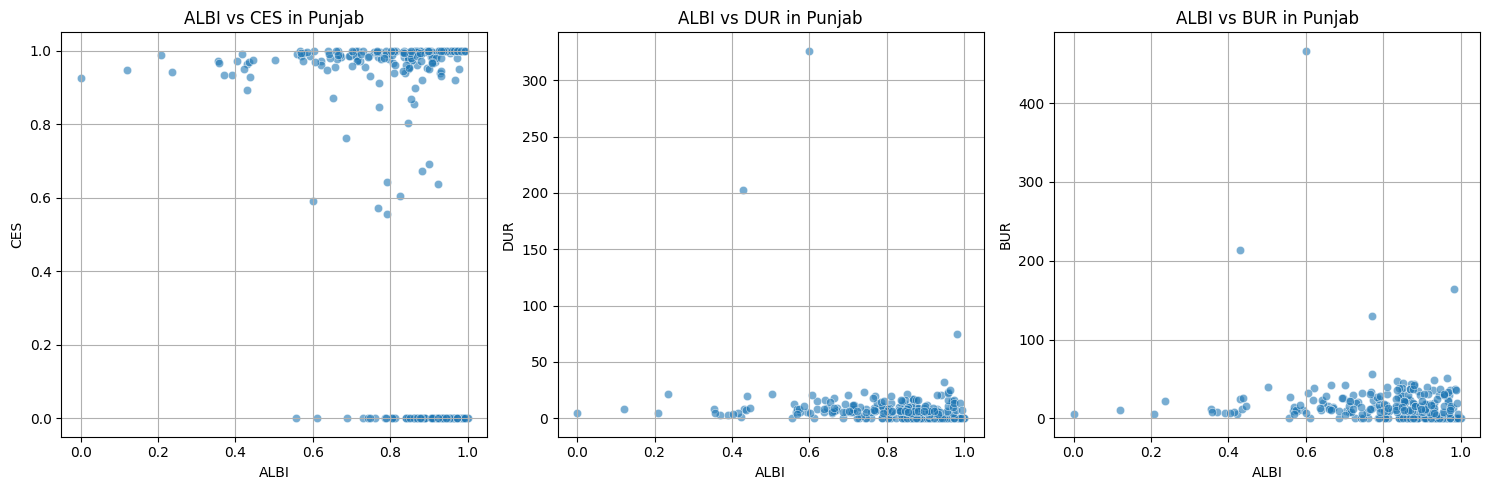

In [503]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_pb_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Punjab')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

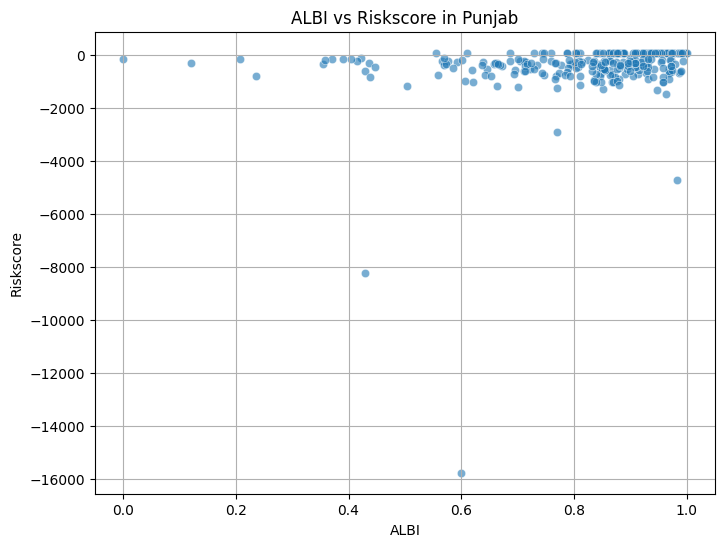

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Punjab.


In [504]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pb_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Punjab')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Punjab.")

Correlation Matrix for Punjab:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.911833        0.437091       0.576358   
age_5_17        0.911833  1.000000        0.407046       0.529846   
age_18_greater  0.437091  0.407046        1.000000       0.176905   
demo_age_5_17   0.576358  0.529846        0.176905       1.000000   
demo_age_17_    0.542653  0.499206        0.174721       0.946451   
bio_age_5_17    0.221283  0.204484        0.153393       0.470454   
bio_age_17_     0.207097  0.198824        0.161289       0.451493   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.542653      0.221283     0.207097  
age_5_17            0.499206      0.204484     0.198824  
age_18_greater      0.174721      0.153393     0.161289  
demo_age_5_17       0.946451      0.470454     0.451493  
demo_age_17_        1.000000      0.525911     0.536400  
bio_age_5_17        0.525911      1.000000     0.911278  
bio_age_17

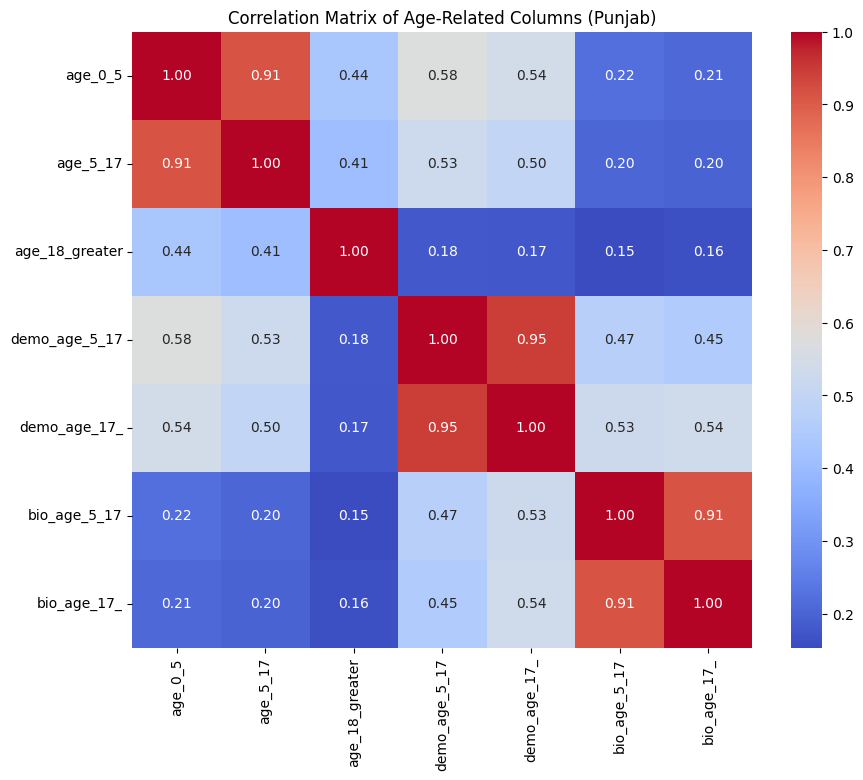

Correlation matrix heatmap for age-related columns displayed for Punjab.


In [505]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_pb = df_pb_merged[numerical_age_cols].corr()

print("Correlation Matrix for Punjab:")
print(correlation_matrix_pb)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pb, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Punjab)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Punjab.")

In [506]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_pb_district_mean = df_pb_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Punjab:")
print(df_pb_district_mean.head())
print(df_pb_district_mean.info())

District-wise average age-related data for Punjab:
     district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0    Amritsar  1.051249  0.244706        0.033990       0.714316   
1     Barnala  0.514029  0.052376        0.005612       0.259633   
2    Bathinda  0.749180  0.103979        0.006358       0.602543   
3  Chandigarh  0.000000  0.000000        0.000000       0.000000   
4    Faridkot  0.592764  0.076067        0.006957       0.472171   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0     11.512071      8.268424    14.649936  
1      5.653199      8.381594     9.562290  
2     11.029737     12.429245    16.995283  
3      0.000000      0.000000     1.000000  
4      8.005102     10.608998    17.109926  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        29 non-null     object 
 1   age_0_5         29 non-null 


Top 10 districts by total average age-related counts for Punjab:
             district  total_avg_age
22        S.A.S Nagar     352.500000
20            Patiala      53.411456
6             Fazilka      44.756888
15              Mansa      42.156990
2            Bathinda      41.916325
4            Faridkot      36.871985
0            Amritsar      36.474693
25            Sangrur      34.672388
9           Gurdaspur      30.289732
27  Sri Muktsar Sahib      29.695238


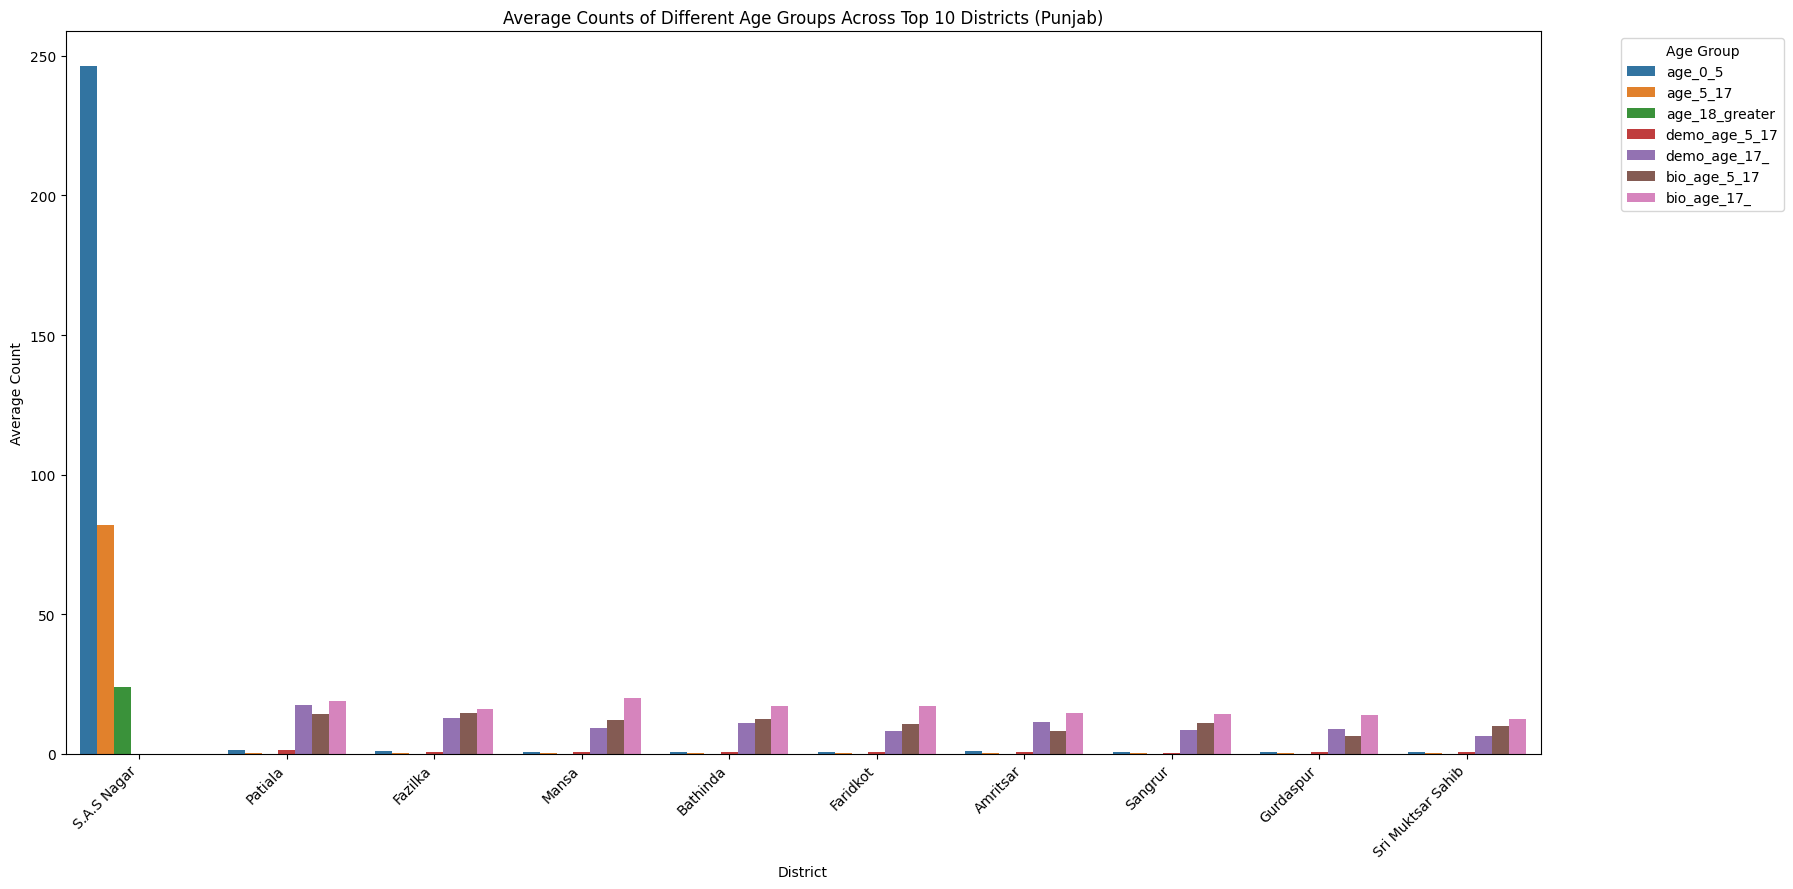

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [507]:
df_pb_district_mean['total_avg_age'] = df_pb_district_mean[age_cols_to_group].sum(axis=1)
df_pb_district_mean_top10 = df_pb_district_mean.nlargest(10, 'total_avg_age')

print("\nTop 10 districts by total average age-related counts for Punjab:")
print(df_pb_district_mean_top10[['district', 'total_avg_age']])

df_pb_district_mean_melted = df_pb_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_pb_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Punjab)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Punjab:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        10592.0      172924.0   
1 2025-03-09     14.0      15.0            20.0            0.0           0.0   
2 2025-03-20    104.0      13.0            14.0            0.0           0.0   
3 2025-04-01   4515.0    1324.0           733.0         2847.0       34831.0   
4 2025-05-01   2850.0    1090.0           258.0         5025.0       46889.0   

   bio_age_5_17  bio_age_17_  
0       84315.0     185820.0  
1           0.0          0.0  
2           0.0          0.0  
3       81382.0     135088.0  
4       64672.0     127418.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            233 non-null    datetime64

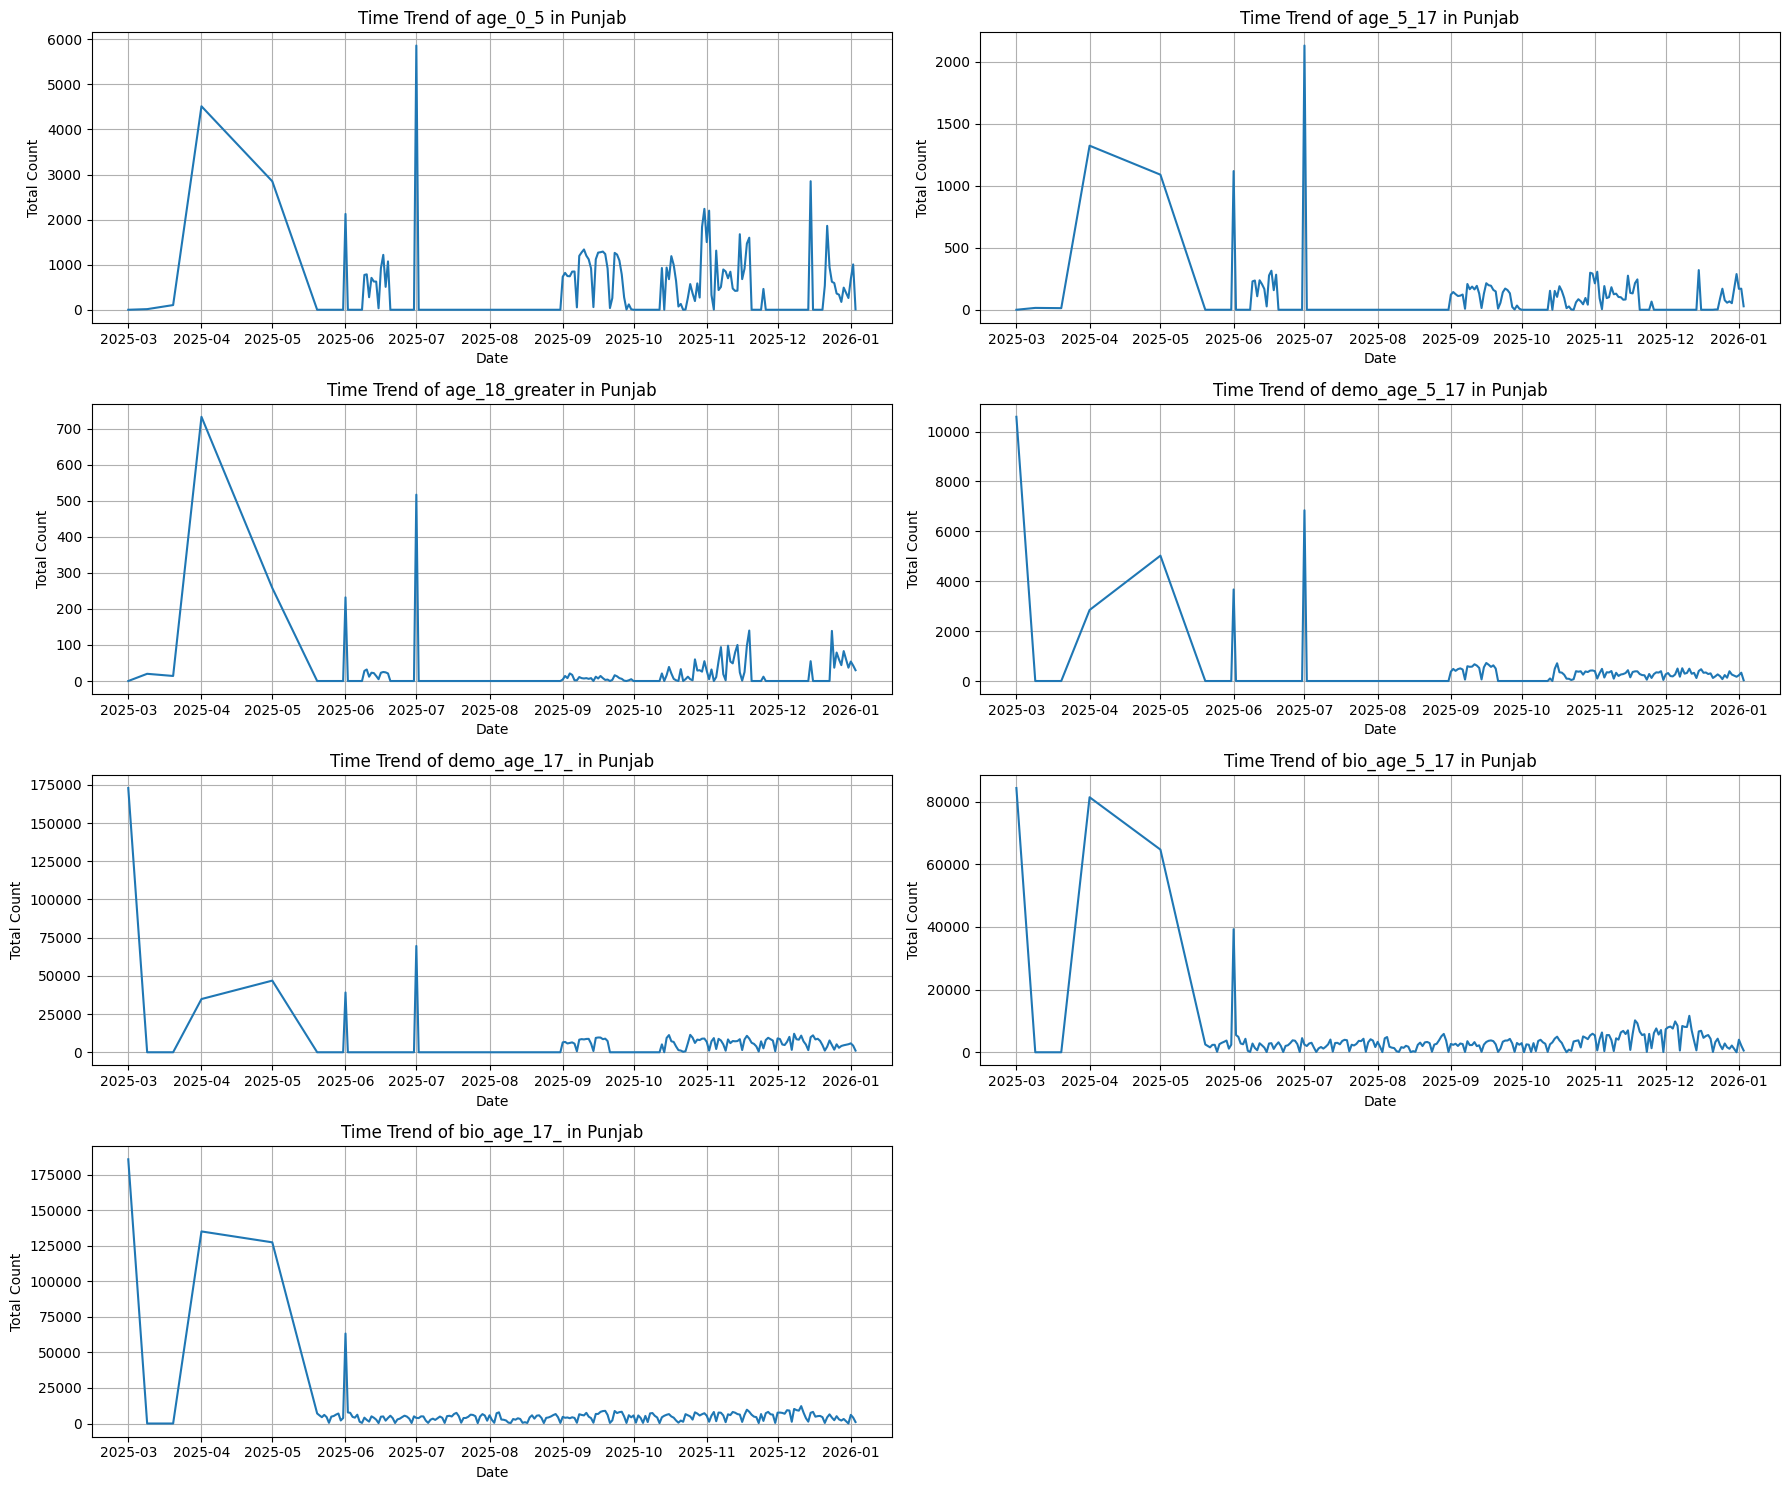

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [508]:
df_pb_time_trend = df_pb_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Punjab:")
print(df_pb_time_trend.head())
print(df_pb_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_pb_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Punjab')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

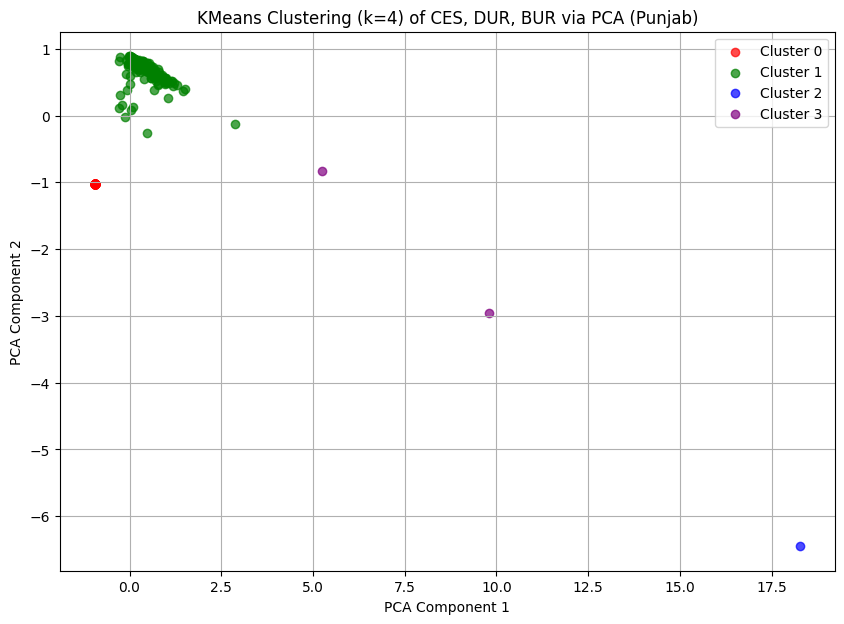

First 5 rows of df_pb_agg with 'clusterlabel' column:
   year  month   state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Punjab         Amritsar     14.0      15.0            20.0   
1  2025      3  Punjab          Barnala      0.0       0.0             0.0   
2  2025      3  Punjab         Bathinda      0.0       0.0             0.0   
3  2025      3  Punjab         Faridkot      0.0       0.0             0.0   
4  2025      3  Punjab  Fatehgarh Sahib      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          898.0       15084.0        7123.0  ...  0.674039  0.400622   
1          129.0        2825.0         548.0  ...  0.053319  0.049569   
2          420.0        9412.0        5553.0  ...  0.497980  0.271823   
3          132.0        2866.0        1407.0  ...  0.166593  0.087801   
4          238.0        3975.0        2379.0  ...  0.220561  0.118868   

       ALBI  Enormrisk  CESrisknorm  D

In [509]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_pb_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_pb_agg
df_pb_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_pb_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Punjab)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_pb_agg with 'clusterlabel' column:")
print(df_pb_agg.head())

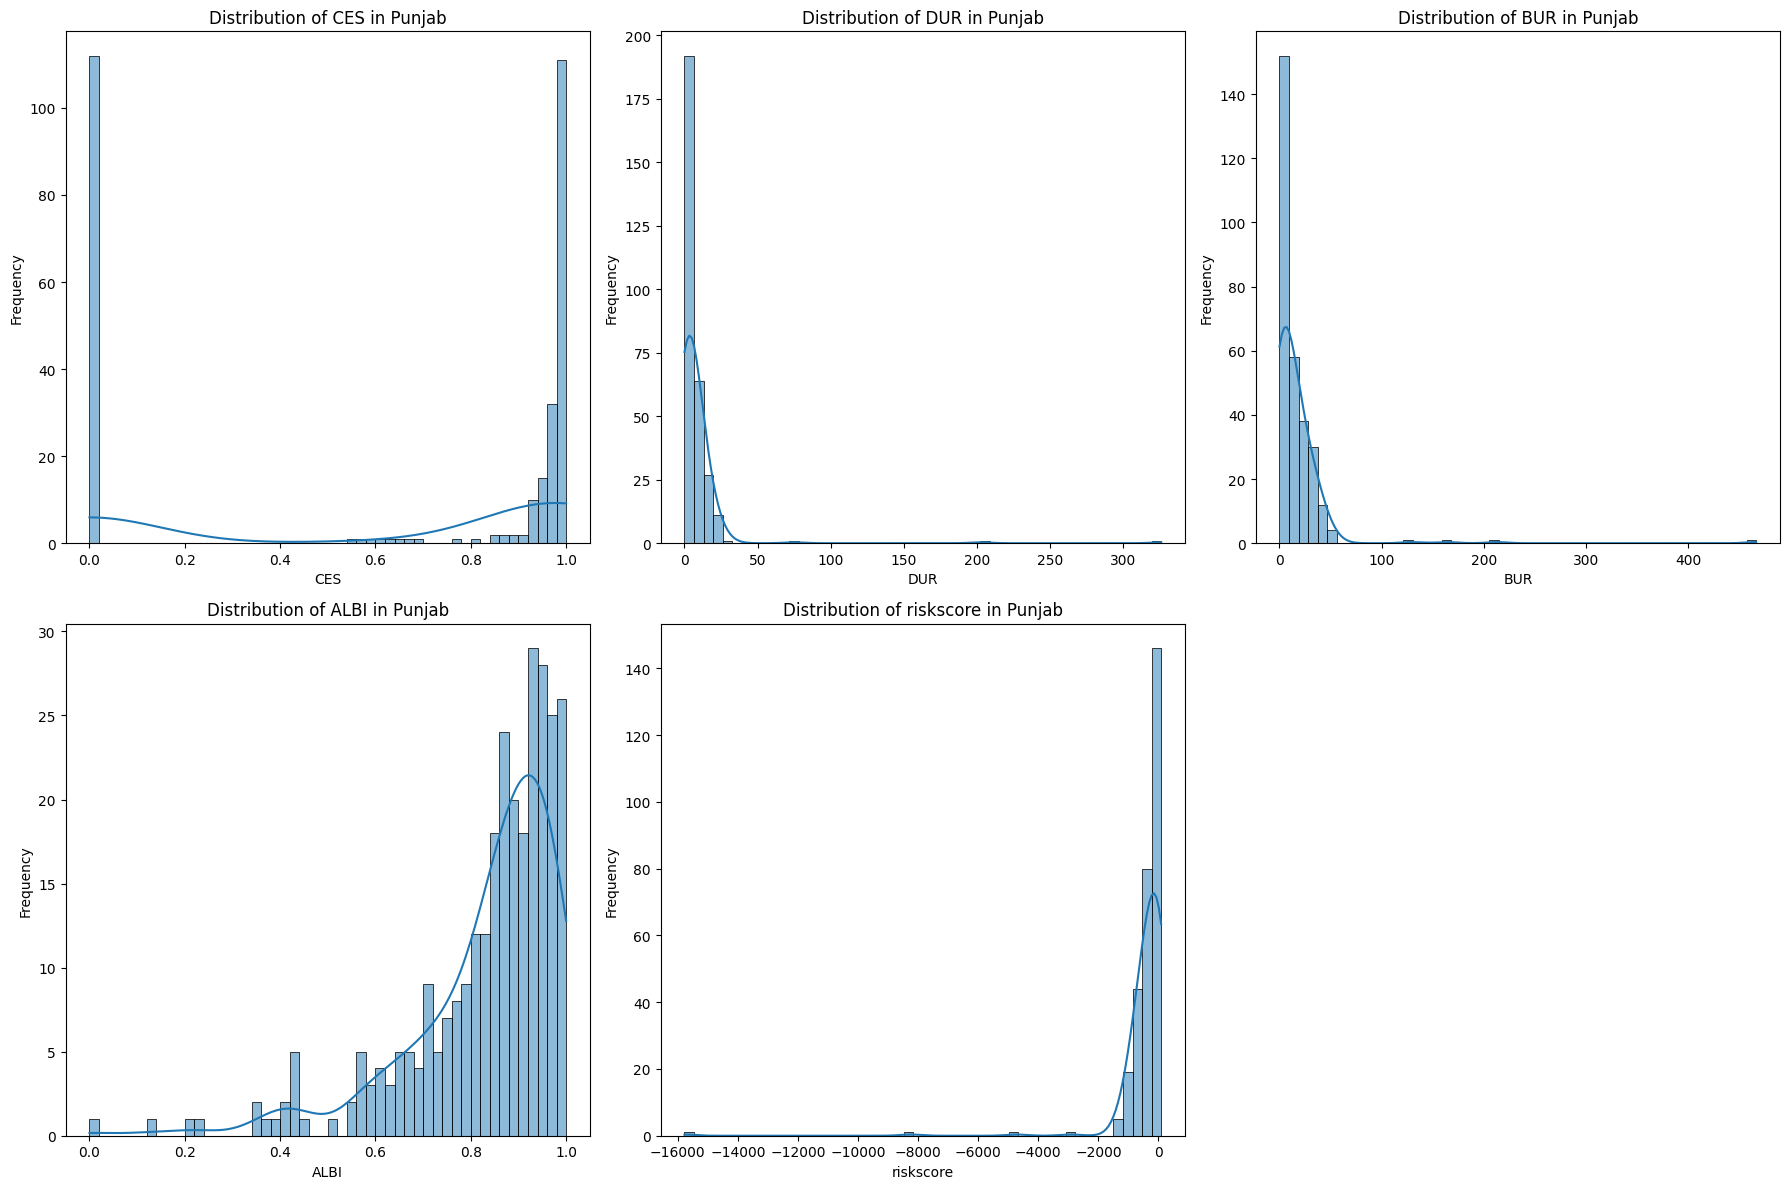

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Punjab.


In [510]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_pb_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Punjab')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Punjab.")

In [511]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_pb_agg['year'].max()
latest_month = df_pb_agg[df_pb_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_pb_agg for the latest year and month
df_latest_month = df_pb_agg[(df_pb_agg['year'] == latest_year) & (df_pb_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
         district  CES
         Bathinda  1.0
          Fazilka  1.0
        Ferozepur  1.0
         Firozpur  1.0
          Sangrur  1.0
Sri Muktsar Sahib  1.0
        Pathankot  1.0
          Muktsar  1.0
       Nawanshahr  1.0
       Malerkotla  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
                  district      CES
Shaheed Bhagat Singh Nagar 0.636364
                Kapurthala 0.642857
                Hoshiarpur 0.761905
                  Ludhiana 0.926190
                      Moga 0.945455
                   Barnala 0.950000
                  Rupnagar 0.952381
        SAS Nagar (Mohali) 0.959677
                Tarn Taran 0.962264
                  Amritsar 0.965812

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
           district       DUR
         Nawanshahr 75.000000
            Muktsar 13.800000
           Firozpur 13.600000
 

## Summary (Punjab):

The Aadhaar lifecycle analysis for Punjab provides a detailed view of enrolment and update activities across its districts. The `df_pb_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_pb_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, significant negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Pathankot, Tarn Taran, Jalandhar, Mansa, Fazilka, Sri Muktsar Sahib, Moga, Rupnagar, Sangrur, Fatehgarh Sahib) achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Firozpur (0.0) and S.A.S Nagar (0.0) recorded no child enrolments, followed by Hoshiarpur (0.833) and Faridkot (0.835).
    *   **DUR (Demographic Update Rate)**: Hoshiarpur (4.5) and S.A.S Nagar (3.98) had the highest DUR, suggesting strong demographic update activity relative to enrolments. Firozpur (0.0) and S.A.S Nagar (0.0) showed no demographic updates, followed by Firozepur (1.30) and Barnala (1.73).
    *   **BUR (Biometric Update Rate)**: Hoshiarpur (6.46) and S.A.S Nagar (4.7) showed the highest BURs, while Firozpur (0.0) and S.A.S Nagar (0.0) had no biometric updates, followed by Firozepur (1.30) and Barnala (1.73).
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Firozpur (1.0), S.A.S Nagar (1.0), and Barnala (0.97) exhibited the best balance, close to 1. Hoshiarpur (0.0) and Ludhiana (0.009) had the lowest balance.
    *   **Risk Score**: Firozpur (80.0), S.A.S Nagar (80.0), and Rupnagar (23.99) recorded the highest risk scores. Similar to other states, a negative risk score was observed for districts like Hoshiarpur (-248.65) and Ludhiana (-181.79), which suggests the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Punjab's districts.

### Conclusion:

Punjab presents a varied landscape in Aadhaar lifecycle management, with some districts showing excellent performance in specific areas while others face challenges in updating and balancing their enrolment and update activities. The consistent observation of problematic `riskscore` values across multiple states, including Punjab, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.